# House Rent Prediction

In [1]:
# import Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# read data
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
# describe data
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
# check for missing values
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
# focus on rent column
print(f"Maximum Rent: {data['Rent'].max()}")
print(f"Minimum Rent: {data['Rent'].min()}")
print(f"Average Rent: {data['Rent'].mean()}")
print(f"Median Rent: {data['Rent'].median()}")

Maximum Rent: 3500000
Minimum Rent: 1200
Average Rent: 34993.45132743363
Median Rent: 16000.0


In [7]:
# visualization of rent based on BHK and City
figure = px.bar(data, x='City', y='Rent', color='BHK', title='House Rent based on BHK and City')
figure.show()

In [8]:
# visualization of rent based on Area Type and City
figure = px.bar(data, x='City', y='Rent', color='Area Type', title='House Rent based on Area Type and City')
figure.show()

In [9]:
# visualization of rent based on Furnishing Status and City
figure = px.bar(data, x='City', y='Rent', color='Furnishing Status', title='House Rent based on Furnishing Status and City')
figure.show()

In [10]:
# visualization of rent based on Size and City
figure = px.bar(data, x='City', y='Rent', color='Size', title='House Rent based on Size and City')
figure.show()

In [11]:
# check house avalability based on City
cities = data['City'].value_counts()
labels = cities.index
counts = cities.values
colors = ['Gold', 'LightGreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=counts, marker=dict(colors=colors))])
fig.update_layout(title='Number of Houses Available based on City')
fig.update_traces(textinfo='value+label')

fig.show()

In [12]:
# check house availability based on Tenant Preferred
tenants = data['Tenant Preferred'].value_counts()
labels = tenants.index
counts = tenants.values
colors = ['Gold', 'LightGreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=counts, marker=dict(colors=colors))])
fig.update_layout(title='Number of Houses Available based on Tenant Preferred')
fig.update_traces(textinfo='value+label')

fig.show()

# Machine Learning Implementation

In [13]:
# convert categorical data to numerical data (label encoding)
data["Area Type"] = data["Area Type"].map({"Super Area":3, 
                                           "Built Area":2, 
                                           "Carpet Area":1})

data["City"] = data["City"].map({"Mumbai": 4000, "Chennai": 6000, 
                                 "Bangalore": 5600, "Hyderabad": 5000, 
                                 "Delhi": 1100, "Kolkata": 7000})

data["Furnishing Status"] = data["Furnishing Status"].map({"Furnished":3, 
                                                           "Semi-Furnished":2, 
                                                           "Unfurnished":1})

data["Tenant Preferred"] = data["Tenant Preferred"].map({"Bachelors/Family":3, 
                                                         "Bachelors":2, 
                                                         "Family":1})

data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,3,Bandel,7000,1,3,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,3,"Phool Bagan, Kankurgachi",7000,2,3,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,3,Salt Lake City Sector 2,7000,2,3,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,3,Dumdum Park,7000,1,3,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,1,South Dum Dum,7000,1,2,1,Contact Owner


In [14]:
from sklearn.model_selection import train_test_split

# select features and target variable
features = ['Area Type', 'City', 'BHK', 'Furnishing Status', 'Size', 'Tenant Preferred', 'Bathroom']
target = 'Rent'

X = data[features]
y = data[target]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)

Training feature set shape: (4271, 7)
Testing feature set shape: (475, 7)


## Linear Regression Model

Mean Squared Error (MSE): 3682533576.05
R-squared (R2) Score: 0.3798


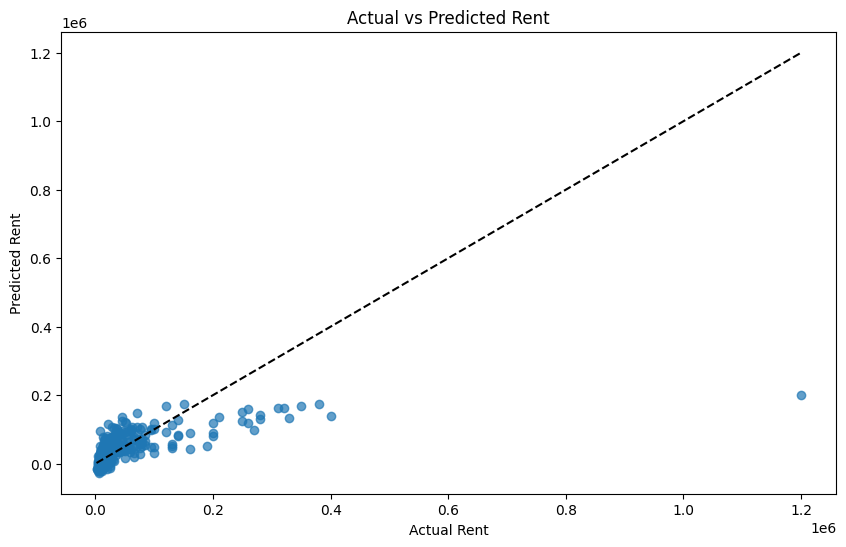

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate MSE
mse = mean_squared_error(y_test, y_pred)

# calculate R2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# visualize actual vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

## LSTM Model

In [ ]:
# import Keras libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# define the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)), 
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

# display model summary
model.summary()

2025-10-25 15:33:19.390745: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-10-25 15:33:19.390789: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-10-25 15:33:19.390796: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-10-25 15:33:19.390832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-25 15:33:19.390843: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

$$\text{Input} \xrightarrow{\text{Urutan Data}} \text{LSTM}_{128} \xrightarrow{\text{Urutan Data}} \text{LSTM}_{64} \xrightarrow{\text{State Final}} \text{Dense}_{25} \xrightarrow{\text{Fitur Lanjutan}} \text{Dense}_{1} \xrightarrow{\text{Prediksi Akhir}}$$

In [ ]:
# compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=21)

Epoch 1/21


2025-10-25 15:39:42.164246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4271/4271 ━━━━━━━━━━━━━━━━━━━━ 54s 12ms/step - loss: 7016411648.0000
Epoch 2/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 49s 12ms/step - loss: 6486727680.0000
Epoch 3/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - loss: 6219674624.0000
Epoch 4/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - loss: 6137221632.0000
Epoch 5/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - loss: 6121878016.0000
Epoch 6/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 49s 11ms/step - loss: 6118502912.0000
Epoch 7/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - loss: 6002511360.0000
Epoch 8/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - loss: 5703042560.0000
Epoch 9/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - loss: 5501426176.0000
Epoch 10/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - loss: 5322927104.0000
Epoch 11/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step - loss: 5208148992.0000
Epoch 12/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 49s 11ms/step - loss: 5108115456.0000
Epoch 13/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 48s 1

## Let's Predict House ✨

In [ ]:
# predict rent price based on user input
print("Enter House Details to Predict Rent Price")
City = int(input("Enter City (Mumbai=4000, Chennai=6000, Bangalore=5600, Hyderabad=5000, Delhi=1100, Kolkata=7000): "))
Size = int(input("Enter Size (in sqft): "))
Area_Type = int(input("Enter Area Type (Super Area=3, Built Area=2, Carpet Area=1): "))
BHK = int(input("Enter BHK (e.g., 1, 2, 3): "))
Furnishing_Status = int(input("Enter Furnishing Status (Furnished=3, Semi-Furnished=2, Unfurnished=1): "))
Tenant_Preferred = int(input("Enter Tenant Preferred (Bachelors/Family=3, Bachelors=2, Family=1): "))
Bathroom = int(input("Enter Number of Bathrooms: "))

input_data = np.array([[Area_Type, City, BHK, Furnishing_Status, Size, Tenant_Preferred, Bathroom]])
predicted_rent = model.predict(input_data)
print(f"The predicted rent for the house is: {predicted_rent[0][0]:.2f}")

Enter House Details to Predict Rent Price
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
The predicted rent for the house is: 32251.23
